# Разведочный анализ данных. Исследование и визуализация данных.

## 1) Текстовое описание набора данных

В качестве набора данных мы будем использовать набор данных 
по предсказанию диабета у женщин - https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

Цель набора данных - диагностически предсказать, есть ли у пациента диабет или нет, на основе определенных диагностических измерений, включенных в набор данных. На выбор этих экземпляров из более крупной базы данных было наложено несколько ограничений. В частности, все пациенты здесь - женщины в возрасте не менее 21 года индийского происхождения Пима. Эта задача актуальна, т.к. кол-во больных ежегодно растет.

Датасет состоит из одного файла:
- diabetes.csv - обучающая выборка

Файл содержит следующие колонки:
- Pregnancies - количество беременностей
- Glucose - концентрация глюкозы в плазме крови через 2 часа при пероральном тесте на толерантность к глюкозе.
- BloodPressure - диастолическое кровяное давление (мм рт. ст.).
- SkinThickness - толщина кожной складки трицепса (мм).
- Insulin - 2-часовой сывороточный инсулин (ме Ед/мл).
- BMI - индекс массы тела (вес в кг/(рост в м)^2).
- DiabetesPedigree - Функция родословной диабета.
- Age - возраст (годы).
- Outcome - переменная класса (0 или 1).

# Импорт библиотек
Импортируем библиотеки с помощью команды import.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Загрузка данных

Загрузим файлы датасета в помощью библиотеки Pandas. 

In [2]:
data = pd.read_csv('diabetes.csv')

# 2) Основные характеристики датасета

In [3]:
# Первые 5 строк датасета
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Размер датасета - 768 строк, 9 колонок
data.shape

(768, 9)

In [5]:
# Список колонок
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [9]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
data['Glucose'].fillna(data['Glucose'].median(), inplace =True)

data['BloodPressure'].fillna(data['BloodPressure'].median(), inplace =True)

data['BMI'].fillna(data['BMI'].median(), inplace =True)

In [11]:
by_Glucose_Age_Insulin_Grp = data.groupby(['Glucose'])

def fill_Insulin(series):
    return series.fillna(series.median())
data['Insulin'] = by_Glucose_Age_Insulin_Grp['Insulin'].transform(fill_Insulin)

In [12]:
data['Insulin'] = data['Insulin'].fillna(data['Insulin'].mean())


In [13]:
by_BMI_Insulin = data.groupby(['BMI'])

def fill_Skinthickness(series):
    return series.fillna(series.mean())
data['SkinThickness'] = by_BMI_Insulin['SkinThickness'].transform(fill_Skinthickness)

In [14]:
data['SkinThickness'].fillna(data['SkinThickness'].mean(),inplace= True)

In [15]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
# Основные статистические характеристки набора данных
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,28.614922,148.888587,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.648424,100.472514,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,22.000000,88.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.614922,130.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,35.000000,175.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
# Определим уникальные значения для целевого признака

data['Outcome'].unique()

array([1, 0], dtype=int64)

Целевой признак является бинарным и содержит только значения 0 и 1.

# 3) Визуальное исследование датасета

### Диаграмма рассеяния
Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости. Не предполагается, что значения упорядочены (например, по времени).

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

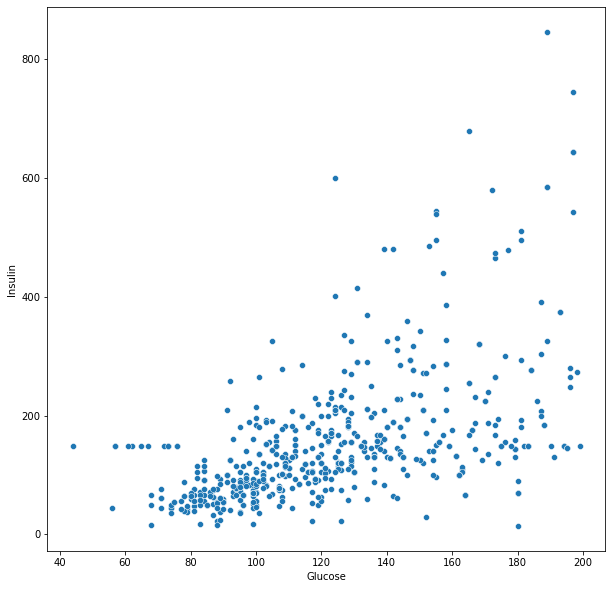

In [18]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Glucose', y='Insulin', data=data)

Видим явную линейную зависимость

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

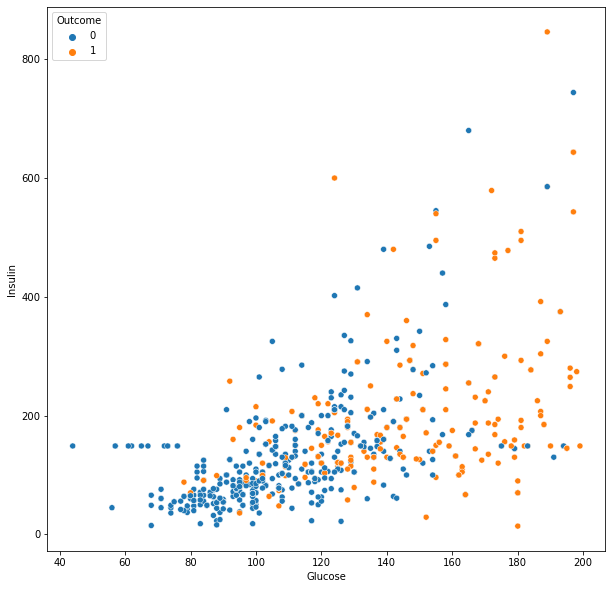

In [19]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Glucose', y='Insulin', data=data, hue='Outcome')

## Гистограмма
Позволяет оценить плотность вероятности распределения данных.

<AxesSubplot:xlabel='Glucose', ylabel='Density'>

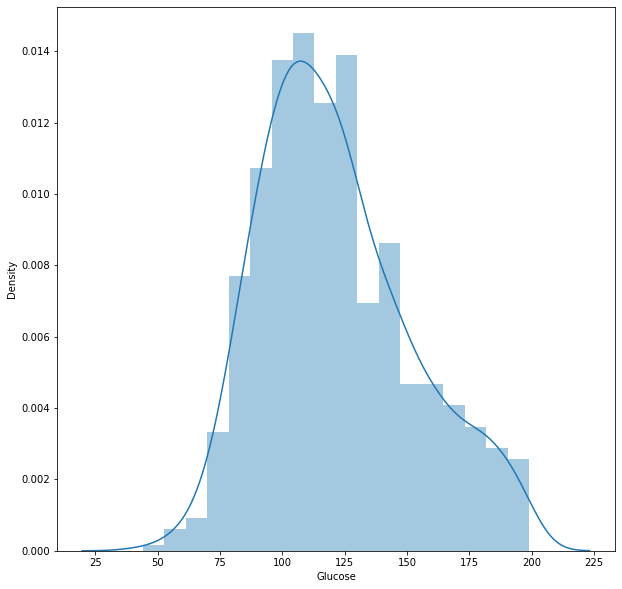

In [20]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['Glucose'])

### Jointplot
Комбинация гистограмм и диаграмм рассеивания.

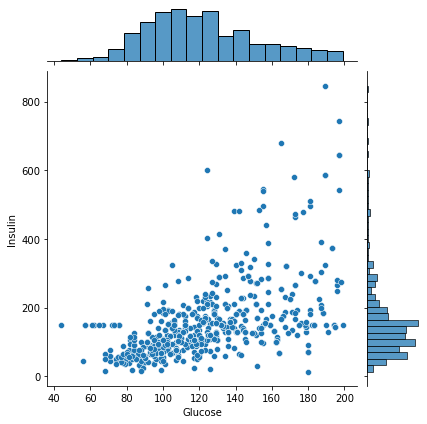

In [21]:
sns.jointplot(x='Glucose', y='Insulin', data=data)

### "Парные диаграммы"
Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

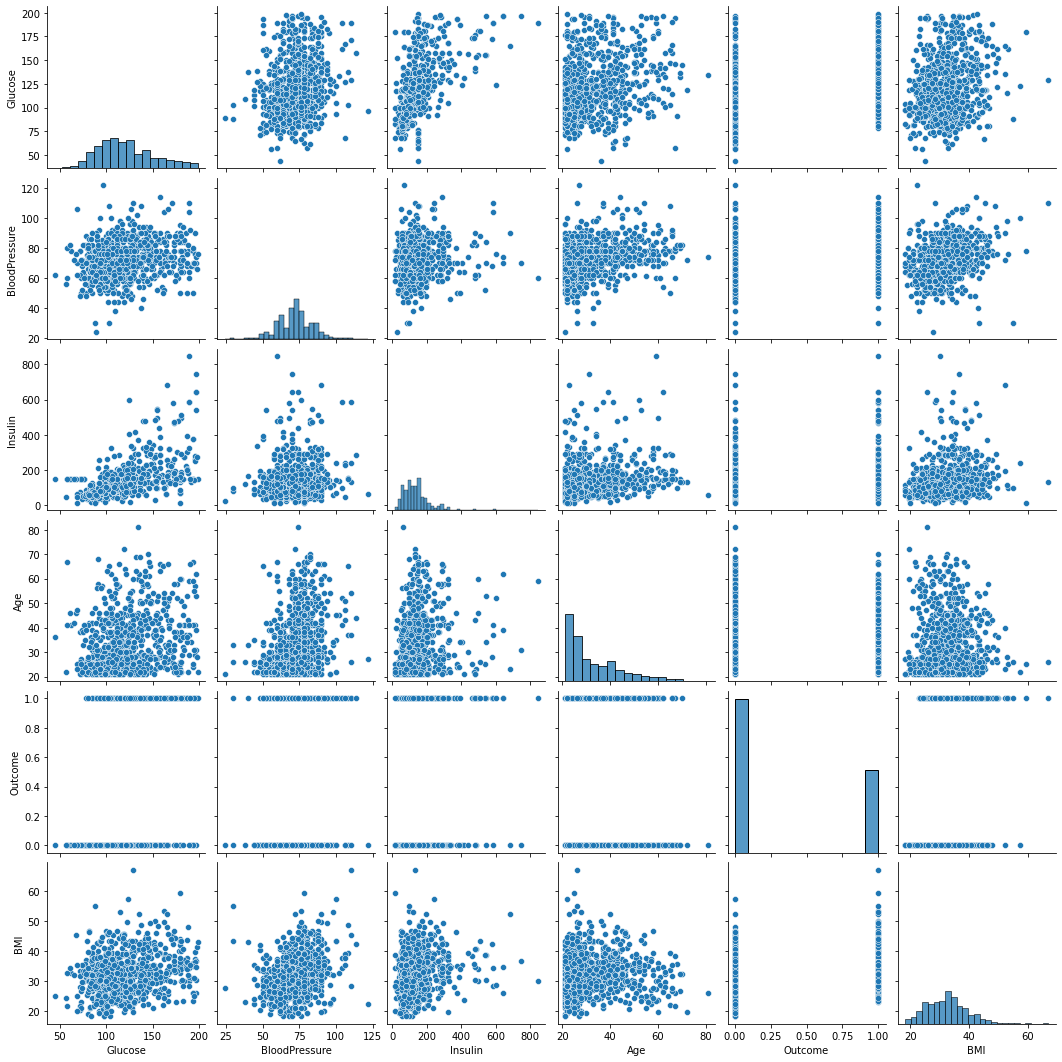

In [22]:
mean_col = ['Glucose','BloodPressure','Insulin','Age','Outcome','BMI']

sns.pairplot(data[mean_col],palette='Accent')

### Ящик с усами
Отображает одномерное распределение вероятности.

<AxesSubplot:xlabel='SkinThickness'>

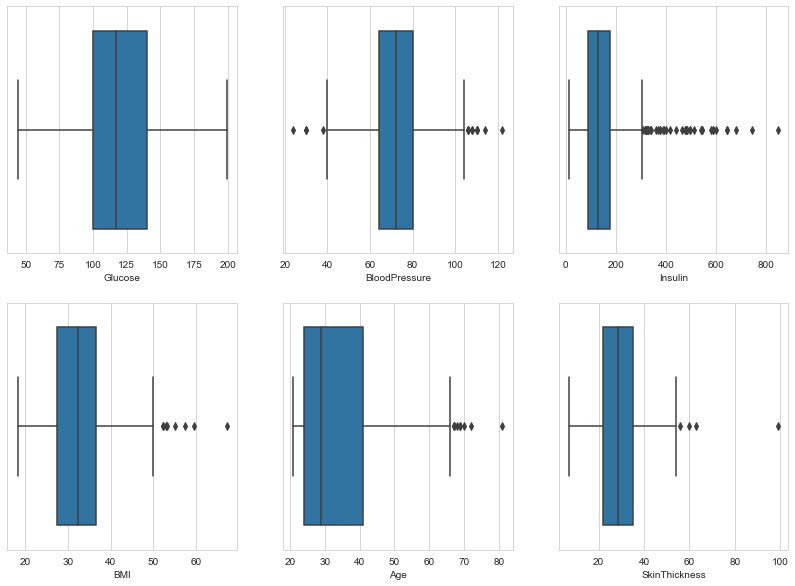

In [23]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Glucose',data=data)
plt.subplot(2,3,2)
sns.boxplot(x='BloodPressure',data=data)
plt.subplot(2,3,3)
sns.boxplot(x='Insulin',data=data)
plt.subplot(2,3,4)
sns.boxplot(x='BMI',data=data)
plt.subplot(2,3,5)
sns.boxplot(x='Age',data=data)
plt.subplot(2,3,6)
sns.boxplot(x='SkinThickness',data=data)

### Violin plot
Похоже на предыдущую диаграмму, но по краям отображаются распределения плотности - 

<AxesSubplot:xlabel='Glucose'>

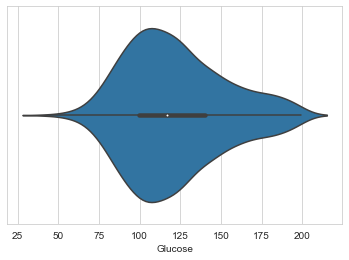

In [24]:
sns.violinplot(x=data['Glucose'])

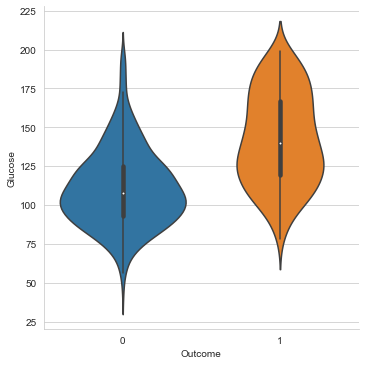

In [25]:
sns.catplot(y='Glucose', x='Outcome', data=data, kind="violin", split=True)

# 4) Информация о корреляции признаков

In [26]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.064381,0.046741,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.188996,0.566640,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.183123,0.125499,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.064381,0.188996,0.183123,1.000000,0.210167,0.636708,0.128380,0.108672,0.232150
Insulin,0.046741,0.566640,0.125499,0.210167,1.000000,0.198895,0.114325,0.185146,0.279690
BMI,0.021559,0.231049,0.281257,0.636708,0.198895,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.128380,0.114325,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.108672,0.185146,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.232150,0.279690,0.312038,0.173844,0.238356,1.000000


Корреляционная матрица содержит коэффициенты корреляции между всеми парами признаков.

Корреляционная матрица симметрична относительно главной диагонали. На главной диагонали расположены единицы (корреляция признака самого с собой).

На основе корреляционной матрицы можно сделать следующие выводы:
- Целевой признак наиболее сильно коррелирует с глюкозой (0.47). Этот признак обязательно следует оставить в модели.
- Целевой признак слабо коррелирует с инсулином (0.13) и функцией родословной (0.17). Скорее всего эти признаки стоит исключить из модели, возможно они только ухудшат качество модели.
- Возраст сильно коррелирует с кол-вом беременностей (0.54). 

<AxesSubplot:>

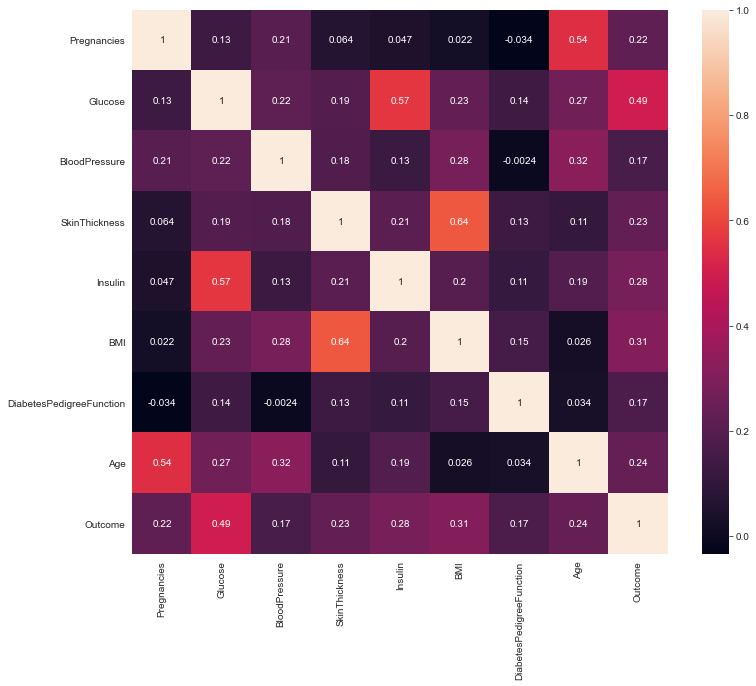

In [27]:
plt.figure(figsize = (12,10))

sns.heatmap(data.corr(), annot =True)